# TASK 4 - To Explore Decision Tree Algorithm

### Problem Statement: For the given 'Iris' dataset create Decision Tree Classifier and visualize it graphically.  

### Importing Necessary libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import graphviz

   ### Loading the Dataset

In [2]:
df = pd.read_csv('datasets_19_420_Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df.drop('Id', axis=1, inplace=True)
df.info()
#Checking for null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


### Exploratory Data Analysis

Iris-versicolor    50
Iris-virginica     50
Iris-setosa        50
Name: Species, dtype: int64


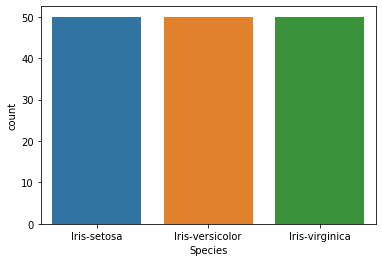

In [4]:
#Determining the spread of data points among different classes.
print(pd.value_counts(df.Species))
sns.countplot(x='Species',data = df)

C:\Users\rambr\anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


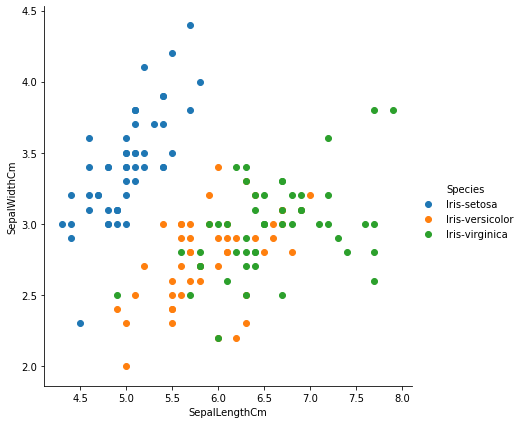

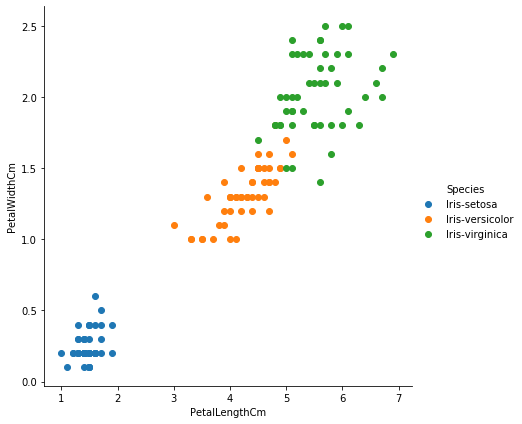

In [5]:
sns.FacetGrid(df, hue="Species",size=6) \
   .map(plt.scatter, "SepalLengthCm", "SepalWidthCm") \
   .add_legend()

sns.FacetGrid(df, hue="Species", size=6) \
   .map(plt.scatter, "PetalLengthCm", "PetalWidthCm") \
   .add_legend()

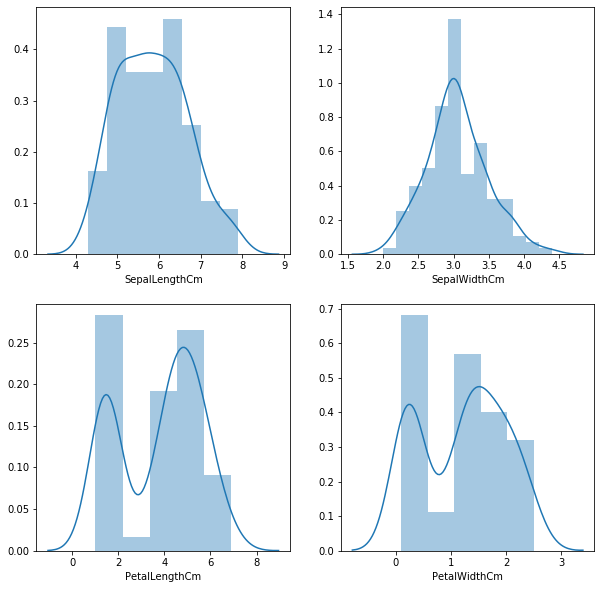

In [6]:
plt.figure(figsize=(10,10))
feature = df.columns[0:-1]
for i in enumerate (feature):
    plt.subplot(2,2, i[0]+1)
    sns.distplot(df[i[1]])

C:\Users\rambr\anaconda3\lib\site-packages\seaborn\axisgrid.py:2079: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


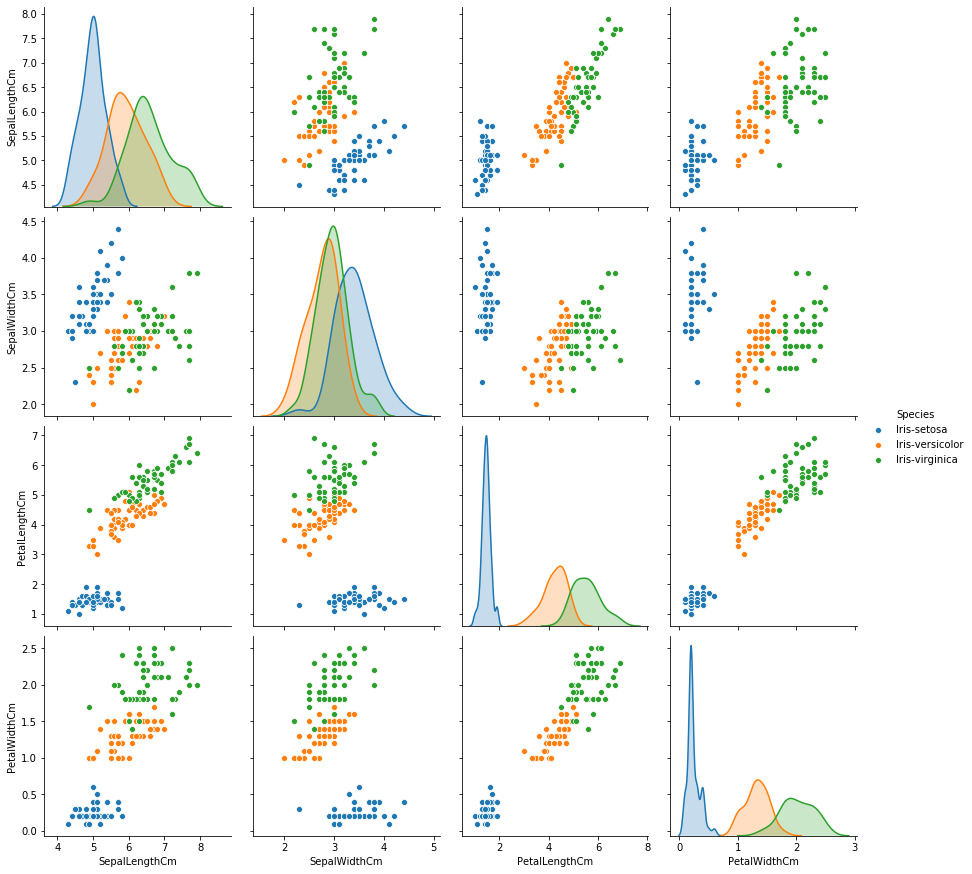

In [7]:
sns.pairplot(df, hue="Species", size=3)

## Correlation Heatmap

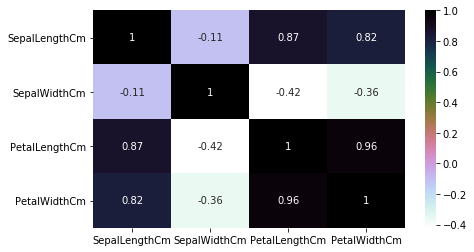

In [8]:
plt.figure(figsize=(7,4)) 
sns.heatmap(df.corr(),annot=True,cmap="cubehelix_r") 
#draws  heatmap with input as the correlation matrix calculted by(df.corr())
plt.show()

### Preparing the data

#### Assigning the features to variable 'X' and the target variable to 'Y'

In [9]:
X = df.iloc[:, :-1]
X

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [10]:
Y = df.iloc[:,-1]
Y

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: Species, Length: 150, dtype: object

In [11]:
#Splitting the dataset into training and validation sets
from sklearn.model_selection import train_test_split,GridSearchCV
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.25,random_state=0)

## Defining the Decision Tree Algorithm :

### Tuning the hyperparameters

In [12]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz

dtc_model = DecisionTreeClassifier()
gs_1 = GridSearchCV(dtc_model,
                    {'criterion': ('gini','entropy'),
                     'max_depth': range(1,15)},
                     cv=5,
                     n_jobs=2,
                     verbose=1)

gs_1.fit(X_train,y_train)

print(gs_1.best_params_)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


{'criterion': 'gini', 'max_depth': 3}


[Parallel(n_jobs=2)]: Done 140 out of 140 | elapsed:    2.5s finished


### Training the data with best estimator obtained from GridSearchCV

In [13]:
main_model = gs_1.best_estimator_
main_model.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

### Model Evaluation

In [14]:
from sklearn import metrics
print(f'Accuracy: {metrics.accuracy_score(main_model.predict(X_test),y_test)*100}')
print(metrics.classification_report(main_model.predict(X_test),y_test))

Accuracy: 97.36842105263158
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        13
Iris-versicolor       0.94      1.00      0.97        15
 Iris-virginica       1.00      0.90      0.95        10

       accuracy                           0.97        38
      macro avg       0.98      0.97      0.97        38
   weighted avg       0.98      0.97      0.97        38



### Visualizing the Decision Tree

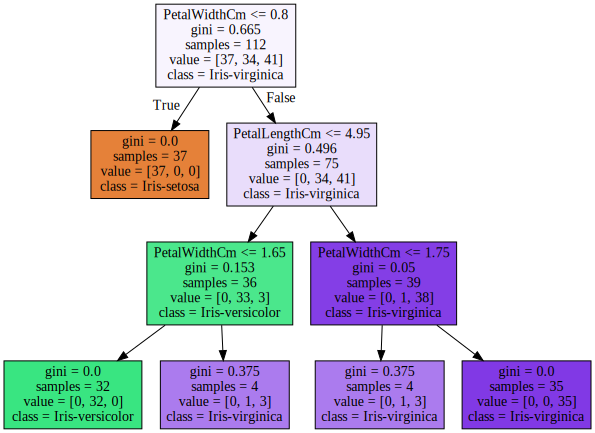

In [15]:
graphviz.Source(export_graphviz(main_model,
                                out_file= None,
                                filled=True,
                                feature_names = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'],
                                class_names =df['Species'].unique() ))

### Feature Importance

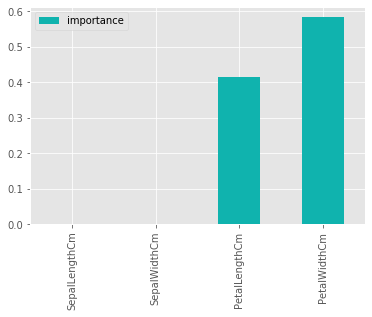

In [16]:
import matplotlib as mpl
mpl.style.use('ggplot')

df=pd.DataFrame({'importance':main_model.feature_importances_},
                index = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'])
df.plot.bar(color='#10b3ae')